Thuật ngữ:

* _Gaussian đa chiều_: _Multivariate Gaussian Distribution_
* _Phân phối Gaussian đa chiều_: _Multivariate Gaussian Distribution_
* _Hàm mật độ xác suất_ : _probability density function_
* _Ma trận hiệp phương sai_: _Covariance matrix_
* _Hiệp phương sai_: _covariance_
* _Hàm hợp lý_: _likelihood function_
* _Phương pháp ước lượng hợp lý tối đa_: _Maximum Likelihood Estimation - MLE_

# Gaussian distribution

Ở chương về [lý thuyết xác suất](https://phamdinhkhanh.github.io/deepai-book/ch_probability/appendix_probability.html#phan-phoi-chuan-gaussian-distribution) chúng ta đã được làm quen với phân phối Gaussian. Đây là một phân phối xác suất liên tục đối với một biến ngẫu nhiên thực có _hàm mật độ xác suất_ (_probability density function - pdf_) như sau:

$$f(x) = \frac{1}{\sqrt{2\pi \sigma^2}}\exp \left( -\frac{(x - \mu)^2}{2\sigma^2}\right)$$

Một biến ngẫu nhiên $x$ tuân theo phân phối Gaussian được kí hiệu $x \sim N(\mu, \sigma^2)$ trong đó $\mu, \sigma$ là hai tham số đặc trưng của phân phối Gaussian. Phân phối Gaussian có hình dạng là một quả chuông mà giá trị xác suất lớn nhất tại $x = \mu$, hình dạng của phân phối đối xứng qua $\mu$.

![](https://imgur.com/S9IB3XM.png)

**Hình 1:** Hình dạng đường cong phân phối Gaussian với các cặp tham số $(\mu, \sigma^2)$ khác nhau. Source: [wikipedia]()

Đồng thời theo phương pháp ước lượng hợp lý tối đa [MLE](https://phamdinhkhanh.github.io/deepai-book/ch_ml/NaiveBayes.html#) ta cũng chứng minh được rằng $\hat{\mu} = \mathbb{E}(x)$ và $\hat{\sigma}^2 = \mathbb{Var}(x)$ là những ước lượng tham số phù hợp nhất đối với phân phối theo Gaussian của biến $x$ mà theo đó xác suất xảy ra của dữ liệu là lớn nhất.


Phân phối Gaussian là phân phối đối với dữ liệu một chiều. Trong trường hợp dữ liệu nhiều hơn một chiều thì chúng ta sẽ khái quát hoá phân phối Gaussian dưới dạng _phân phối Gaussian đa chiều_ (_Multivariate Gaussian Distribution_). Cụ thể là trong không gian $d$ chiều thì một biểu diễn _phân phối Gaussian đa chiều_ của véc tơ $\mathbf{x} = (x_1, x_2, \dots, x_d)$ được định nghĩa là:

$$f_{\mathbf{x}}(x_1, x_2, \dots, x_d) = \frac{1}{(2\pi)^{d/2}\sqrt{|\mathbf{\Sigma}|}} \exp{ \left( -\frac{1}{2}(\mathbf{x}-\mu)^{\intercal} \mathbf{\Sigma}^{-1}(\mathbf{x}-\mu) \right) }$$

Hoặc chúng ta cũng có thể viết:

$$N(\mathbf{x} | \mu, \mathbf{\Sigma}) = \frac{1}{(2\pi)^{d/2}\sqrt{|\mathbf{\Sigma}|}} \exp{ \left( -\frac{1}{2}(\mathbf{x}-\mu)^{\intercal} \mathbf{\Sigma}^{-1}(\mathbf{x}-\mu) \right) }$$

Trong đó $\mu$ là véc tơ kì vọng theo các chiều của $\mathbf{x}$ và $\mathbf{\Sigma}$ là _ma trận hiệp phương sai_ (_covariance matrix_). _Ma trận hiệp phương sai_ của véc tơ ngẫu nhiên $\mathbf{x} = (x_1, x_2, \dots, x_d)$ có công thức như sau:








$$\mathbb{Cov}(\mathbf{x}) = \begin{bmatrix}
\mathbb{Cov}(x_1, x_1) & \mathbb{Cov}(x_1, x_2) & \dots & \mathbb{Cov}(x_1, x_d) \\
\mathbb{Cov}(x_2, x_1) & \mathbb{Cov}(x_2, x_2) & \dots & \mathbb{Cov}(x_2, x_d) \\
\vdots & \vdots & \ddots & \vdots \\
\mathbb{Cov}(x_d, x_1) & \mathbb{Cov}(x_d, x_2) & \dots & \mathbb{Cov}(x_d, x_d) \\
\end{bmatrix}$$

Ta dễ dàng nhận thấy ma trận hiệp phương sai là một ma trận vuông và đối xứng vì có $\mathbb{Cov}(x_i, x_j) = \mathbb{Cov}(x_j, x_i)$. Ngoài ra ma trận hiệp phương sai còn được biểu diễn dưới dạng tích _outer product_ của $\mathbf{x}$ theo công thức:

$$\mathbb{Cov}(\mathbf{x}) = \mathbb{E}[(\mathbf{x}-\mu)(\mathbf{x}-\mu)^{\intercal}]$$

Kí hiệu $|\mathbf{\Sigma}|$ là định thức của ma trận hiệp phương sai. Bên dưới là biểu diễn của phân phối _Bivariate Gaussian Distribution_ có các tham số lần lượt là: $\mu = (0, 0)$ và $\mathbf{\Sigma} = \begin{bmatrix} 1, 0 \\ 0, 1 \end{bmatrix}$.


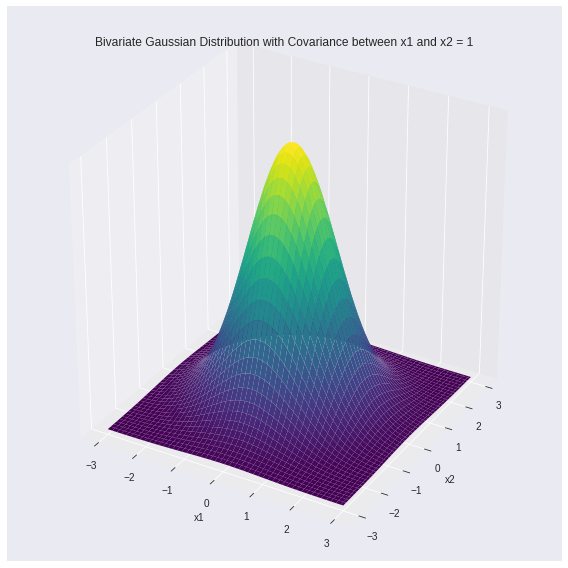

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
 
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=8,8
fig = plt.figure()

# Khởi tạo mean và covariance matrix
random_seed=1000
mean = np.array([0,0])
cov = np.array([[1, 0], [0, 1]])

# Khởi tạo multivariate gaussian distribution theo mean và covariance matrix
distr = multivariate_normal(cov = cov, mean = mean,
                            seed = random_seed)
  
# Tạo meshgrid complacent với 3-sigma boundary
mean_1, mean_2 = mean[0], mean[1]
sigma_1, sigma_2 = cov[0,0], cov[1,1]
  
x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
X, Y = np.meshgrid(x,y)
  
# Khởi tạo density function cho mỗi điểm trong meshgrid
pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
  
# Vẽ biểu đồ
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, pdf, cmap = 'viridis')

plt.xlabel("x1")
plt.ylabel("x2")
plt.title('Bivariate Gaussian Distribution with Covariance between x1 and x2 = 1')
pdf_list.append(pdf)
ax.axes.zaxis.set_ticks([])
 
plt.tight_layout()
plt.show()

**Hình 2**: _Phân phối Gaussian_ trong không gian hai chiều với các tham số $\mu = (0, 0)$ và $\mathbf{\Sigma} = \begin{bmatrix} 1, 0 \\ 0, 1 \end{bmatrix}$

# Ước lượng MLE cho _phân phối Gaussian đa chiều_

Giả sử chúng ta có một bộ dữ liệu gồm các quan sát độc lập và xác định (iid) là $\mathcal{D} = \{ \mathbf{x}_1, \mathbf{x}_2. \dots, \mathbf{x}_N \}$. Trong đó mỗi một $\mathbf{x}_i \in \mathbb{R}^{d}$ là một véc tơ quan sát trong không gian $d$ chiều được lấy mẫu từ _phân phối Gaussian đa chiều_. Chúng ta cần ước lượng phân phối của tham số thông qua _ước lượng hợp lý tối đa MLE_.

$N$ quan sát được giả định là độc lập. Do đó hàm hợp lý của phân phối của $N$ quan sát sẽ bằng tích của xác suất trên từng quan sát:

$$\begin{aligned}
	l(\mathbf{ \mu, \Sigma }|\mathcal{D}) & = \log \prod_{i=1}^m f_{\mathbf{x}_{i}}(\mathbf{x}_{i} | \mu , \mathbf{\Sigma} )
	\\
	& =  \log  \ \prod_{i=1}^N \frac{1}{(2 \pi)^{d/2} |\mathbf{\Sigma}|^{1/2}} \exp \left( - \frac{1}{2} (\mathbf{x}_{i} - \mu)^{\intercal} \mathbf{\Sigma}^{-1} (\mathbf{x}_{i} - \mu) \right) 
	\\
	& = \sum_{i=1}^N \left( - \frac{d}{2} \log (2 \pi) - \frac{1}{2} \log |\mathbf{\Sigma}|  - \frac{1}{2}   \mathbf{(x}_{i} - \mu)^{\intercal} \mathbf{\Sigma}^{-1} (\mathbf{x}_{i} - \mu)  \right) 
  \\
  & = - \frac{N}{2} \log |\mathbf{\Sigma}| - \sum_{i=1}^N  \frac{1}{2}   \mathbf{(x}_{i} - \mu)^{\intercal} \mathbf{\Sigma}^{-1} (\mathbf{x}_{i} - \mu) - \frac{Nd}{2} \log (2 \pi) \\
  & = - \frac{N}{2} \log |\mathbf{\Sigma}| - \sum_{i=1}^N  \frac{1}{2}   \mathbf{(x}_{i} - \mu)^{\intercal} \mathbf{\Sigma}^{-1} (\mathbf{x}_{i} - \mu) + C
\end{aligned}$$

Lấy đạo hàm bậc nhất của $\mu$ và $\mathbf{\Sigma}$ theo _hàm hợp lý_.

**Đạo hàm theo** $\mu$:


Để tính toán đạo hàm bậc nhất chúng ta cần áp dụng công thức:
$$\frac{\partial \mathbf{w}^{\intercal}\mathbf{A}\mathbf{w}}{\partial \mathbf{w}} = 2\mathbf{A}\mathbf{w}$$

Coi $\mathbf{\Sigma}^{-1} = \mathbf{A}$ và $\mu - \mathbf{x}_i = \mathbf{w}$, khi đó:

$$\begin{eqnarray}
	\frac{\partial l(\mathbf{ \mu}, \mathbf{ \Sigma} | \mathcal{D} )}{\partial \mu}  & = & \sum_{i=1}^N  \mathbf{ \Sigma^{-1}} ( \mathbf{\mu} - \mathbf{x}_{i} ) \\
  & = & \mathbf{ \Sigma^{-1}}(N\mu - \sum_{i=1}^N \mathbf{x}_i)
\\
  & = & 0
\end{eqnarray}$$

Nhân cả hai vế của dòng thứ 2 với $\mathbf{\Sigma}$ về phía ngoài cùng bên trái ta suy ra nghiệm $\hat{\mu}$ của phương trình chính là:

$$\begin{eqnarray}
 N\hat{\mu} - \sum_{i=1}^N \mathbf{x}_i & = & 0 \\
 \leftrightarrow \hat{\mu} & = & \frac{\sum_{i=1}^{N} \mathbf{x}_i}{N}
\end{eqnarray}$$

**Đạo hàm theo** $\mathbf{\Sigma}$:

Để tính toán đạo hàm theo $\Sigma$ chúng ta cần áp dụng một số công thức:

1.- Trace của tích ba ma trận không thay đổi nếu hoán vị:

$$\text{trace}{(\mathbf{ABC})} = \text{trace}{(\mathbf{CAB})} = \text{trace}{(\mathbf{BCA})}$$

2.- Khi $\mathbf{x}^{\intercal}\mathbf{A}\mathbf{x}$ là một số vô hướng (_scalar_) thì:

$$\mathbf{x}^{\intercal}\mathbf{A} \mathbf{x} = \text{trace}(\mathbf{x}^{\intercal}\mathbf{A}\mathbf{x}) = \text{trace}(\mathbf{x}^{\intercal}\mathbf{x}\mathbf{A})$$

3.- Đạo hàm của: $$\frac{\partial ~ \text{trace}(\mathbf{AB})}{\partial \mathbf{A}} = \frac{\partial ~ \text{trace}(\mathbf{BA})}{\partial \mathbf{A}} = \mathbf{B}^{\intercal}$$

4.- Đạo hàm của: $$\frac{\partial \log(\mathbf{A})}{\partial \mathbf{A}} = \mathbf{A}^{-\intercal}$$

5.- Định thức của một ma trận thì bằng nghịch đảo định thức của ma trận nghịch đảo:
$$|\mathbf{A}| = \frac{1}{|\mathbf{A}^{-1}|}$$

Chứng minh những công thức trên không quá khó. Xin dành cho bạn đọc như một bài tập.

Ngoài ra từ công thức thứ 2 và 3 ta suy ra:

$$\frac{\partial}{\partial \mathbf{A}}  \mathbf{x}^{\intercal}\mathbf{A}\mathbf{x} =\frac{\partial}{\partial \mathbf{A}}  \text{trace} ( \mathbf{x}^{\intercal}\mathbf{x}\mathbf{A} ) = [ \mathbf{x}^{\intercal}\mathbf{x}]^{\intercal} =  \mathbf{x}\mathbf{x}^{\intercal}$$

đồng thời hàm hợp lý cũng được biến đổi thành:

$$
\begin{eqnarray}
	l(\mathbf{ \mu, \mathbf{\Sigma}} | \mathcal{D})  & = & C - \frac{N}{2} \log |\mathbf{\Sigma}|  - \frac{1}{2}  \sum_{i=1}^N  (\mathbf{x}_{i} - \mu)^{\intercal} \mathbf{\Sigma}^{-1} (\mathbf{x}_{i} - \mu)   
	\\
	& = & C + \frac{N}{2} \log |\mathbf{\Sigma}^{-1}|  - \frac{1}{2}  \sum_{i=1}^N  \text{trace}\left[ (\mathbf{x}_{i} - \mu)^{\intercal} (\mathbf{x}_{i} - \mu) \mathbf{\Sigma}^{-1}  \right]
\end{eqnarray}
$$

Bây giờ chúng ta có thể tính toán đạo hàm theo ma trận $\mathbf{\Sigma}^{-1}$ như sau:

$$\begin{eqnarray}
	\frac{\partial l(\mathbf{ \mu, \Sigma}|\mathcal{D})}{\partial \mathbf{\Sigma}^{-1}}  & = & \frac{N}{2}\mathbf{\Sigma}^{\intercal} - \frac{1}{2}  \sum_{i=1}^N (\mathbf{x}_{i} - \mu) (\mathbf{x}_{i} - \mu)^{\intercal} \\
& = & \frac{N}{2}\mathbf{\Sigma} - \frac{1}{2}  \sum_{i=1}^N (\mathbf{x}_{i} - \mu) (\mathbf{x}_{i} - \mu)^{\intercal}
  \end{eqnarray}
$$

Dòng thứ 2 thu được là vì $\mathbf{\Sigma}$ là ma trận đối xứng. Như vậy nghiệm $\hat{\mathbf{\Sigma}}$ chính là:

$$\begin{eqnarray}\frac{N}{2}\hat{\mathbf{\Sigma}} - \frac{1}{2}  \sum_{i=1}^N (\mathbf{x}_{i} - \mu) (\mathbf{x}_{i} - \mu)^{\intercal} & = & 0
\\ \leftrightarrow \hat{\mathbf{\Sigma}} = \frac{\sum_{i=1}^N (\mathbf{x}_{i} - \mu) (\mathbf{x}_{i} - \mu)^{\intercal}}{N}
\end{eqnarray}$$

Như vậy ước lượng hợp lý tối đa cho các tham số của _phân phối Gassian đa chiều chính là_:

$$\begin{eqnarray}\hat{\mu} & = & \frac{\sum_{i=1}^{N} \mathbf{x}_i}{N} = \mathbb{E}(\mathbf{X}) \\
\hat{\mathbf{\Sigma}} & = & \frac{\sum_{i=1}^N (\mathbf{x}_{i} - \mu) (\mathbf{x}_{i} - \mu)^{\intercal}}{N} = \mathbb{Cov}(\mathbf{X})
\end{eqnarray}$$

# Gaussian Mixture Model

_Gaussian Mixture Model_ (viết tắt _GMM_) là một mô hình phân cụm thuộc lớp bài toán học không giám sát mà phân phối xác suất của mỗi một cụm được giả định là _phân phối Gassian đa chiều_. Sở dĩ mô hình được gọi là _Mixture_ là vì xác suất của mỗi điểm dữ liệu không chỉ phụ thuộc vào một phân phối _Gaussian_ duy nhất mà là kết hợp từ nhiều phân phối _Gaussian_ khác nhau từ mỗi cụm.

![](https://imgur.com/6OvUE6Z.png)

**Hình 3**: _Phân phối Gaussian đa chiều_ với số cụm $k=3$ đối với bộ dữ liệu một chiều (bên trái) và hai chiều (bên phải).

Mục tiêu của mô hình _GMM_ là ước lượng tham số phù hợp nhất cho $k$ cụm thông qua phương pháp ước lượng hợp lý tối đa mà chúng ta sẽ thảo luận kĩ hơn ở bên dưới. Một số giả định của mô hình _GMM_:

* Có $k$ cụm cần phân chia mà mỗi cụm tuân theo _phân phối Gaussian đa chiều_ với tập tham số đặc trưng $\{{(\mu_i, \mathbf{\Sigma}_i)}\}_{i=1}^{k}$.
* $z_{k}$ được giả định là một biến ngẫu nhiên nhận giá trị 1 nếu như quan sát $\mathbf{x}$ rơi vào cụm thứ $k$, các trường hợp còn lại nhận giá trị 0.
* $z_{k}$ được coi như là một _biến ẩn_ (_latent variable_ hoặc _hidden variable_) mà ta chưa biết giá trị của nó. Xác suất xảy ra của $p(z_{k}=1 | \mathbf{x})$ giúp chúng ta xác định tham số phân phối của _Gaussian Mixture_. Điều này sẽ được thảo luận kĩ hơn bên dưới.

Tập hợp các giá trị của $z_{k}$ đối với các cụm sẽ tạo thành một phân phối xác suất sẽ tạo thành một phân phối xác suất $(\pi_1, \pi_2, \dots, \pi_k)$ trong đó $\pi_k = p(z_{k}=1 | \mathbf{x})$.

Một xác suất hỗn hợp tại một điểm dữ liệu $\mathbf{x}$ sẽ được tính theo công thức Bayes như sau:

$$\begin{eqnarray}p(\mathbf{x}) & = & \sum_{c=1}^{k}p(z_c)p(\mathbf{x}|z_c)\\
& = & \sum_{c=1}^{k} p(z_c=1) p(\mathbf{x}|\mu_c, \mathbf{\Sigma}_c) \\
& = & \sum_{c=1}^{k} \pi_c p(\mathbf{x}|\mu_c, \mathbf{\Sigma}_c) \\
& = & \sum_{c=1}^{k} \pi_c N(\mathbf{x}|\mu_c, \mathbf{\Sigma}_c) 
\end{eqnarray}$$

Thành phần xác suất $p(\mathbf{x}|\mu_i, \mathbf{\Sigma}_i)$ được tính từ phân phối _Guassian đa chiều_ và chúng đồng thời là mục tiêu mà chúng ta cần tham số hoá.



## Ước lượng hợp lý tối đa

Bài toán đặt ra đó là giả sử chúng ta có một tập dữ liệu $\mathcal{X} = \{\mathbf{x}_i\}_{i=1}^{N}$ hãy tìm ra ước lượng hợp lý tối đa của các tham số $\theta$ sao cho lớp mô hình được giả định là _GMM_ khớp nhất bộ dữ liệu. Như vậy $\theta^{*}$ chính là nghiệm của bài toán:

$$\theta^{*} = \arg \max_{\theta} p(\mathbf{X}|\theta) = \arg \max_{\theta} \prod_{i=1}^{N} p(\mathbf{x}_i| \theta)$$

Để giải phương trình trên chúng ta có thể dựa trên hai cách tiếp cận:

* Giải trực tiếp phương trình đạo hàm của hàm logarith để theo các hệ số để tìm ra nghiệm tối ưu như đã thực hiện đối với _phân phối Gaussian đa biến_ cho 1 cụm. Tuy nhiên phương pháp này tỏ ra bất khả thi bởi đối với bài toán có nhiều cụm thì hàm mất mát trở nên phức tạp hơn nhiều lần. Việc giải phương trình đạo hàm dường như là không thể.

* Sử dụng thuật toán _EM (Expectation-Maximization)_ để cập nhật dần dần nghiệm của $\theta$.

Thuật toán _EM_ là một trong những phương pháp thường được sử dụng để cập nhật nghiệm theo hàm hợp lý. Đây là một phương pháp đơn giản và hiệu quả, phù hợp với các bài toán phức tạp khi mà lời giải trực tiếp từ đạo hàm không dễ dàng tìm kiếm. Bên dưới chúng ta sẽ tiếp tục tìm hiểu phương pháp này:

Trong thuật toán _EM_ sẽ liên tục thực hiện các vòng lặp mà mỗi vòng lặp sẽ lặp lại một chu kì bao gồm hai bước huấn luyện chính:

* E-Step: Ước lượng phân phối của _biến ẩn_ $z$ thể hiện phân phối xác suất của các cụm tương ứng với dữ liệu và bộ tham số phân phối.
* M-Step: Tối đa hoá phân phối xác suất đồng thời (_join distribution probability_) của dữ liệu và _biến ẩn_.

Cụ thể những bước này sẽ được thể hiện qua hình minh hoạ:

![](https://imgur.com/NNCFeR1.png)

**Hình 4**: Hình bên trái là bước E-Step. Tại bước này chúng ta tính toán phân phối xác suất tại từng điểm dữ liệu ứng với mỗi cụm theo bộ tham số phân phối trên từng cụm lúc ban đầu. Chẳng hạn tại một điểm trong hình ở phía trên chúng ta tính ra hai xác suất là $P(A)=0.6$ và $P(B)=0.4$ và tại một điểm ở phía dưới tính ra xác suất $P(A)=0.2$ và $P(B)=0.8$. Tiếp theo hình bên phải là bước M-Step thể hiện cách cập nhật lại tham số để phù hợp với phân phối của các cụm dữ liệu. Ở đây tham số trung bình của các cụm được cập nhật lại đồng nghĩa với việc dịch chuyển cụm sao cho giá trị hợp lý của phân phối lý thuyết được tối đa hoá và tiến gần tới phân phối thực ở mỗi cụm.

Để cập nhật tham số thì chúng ta xét một hàm _auxilary_ như sau:

$$\begin{eqnarray}Q(\theta, \theta_t) & = & \mathbb{E}_{z}(\log p(\mathbf{X}, \mathbf{Z} | \theta_t)) \\
& = & \sum_z p(z|\mathbf{X}, \theta_t) \log p(\mathbf{X}, \mathbf{Z} | \theta) \\
& = & \sum_z p(z|\mathbf{X}, \theta_t) \log \left[~ p(\mathbf{Z} | \mathbf{X}, \theta) p(\mathbf{X} | \theta) \right] \\
& = & \sum_z p(z|\mathbf{X}, \theta_t) \log p(\mathbf{Z} | \mathbf{X}, \theta) + \underbrace{\left[ \sum_z p(z|\mathbf{X}, \theta) \right]}_{1} \log p(\mathbf{X} | \theta) \\
& = & \sum_z p(z|\mathbf{X}, \theta_t) \log p(\mathbf{Z} | \mathbf{X}, \theta) + \log p(\mathbf{X} | \theta)
\end{eqnarray}$$

Như vậy $Q(\theta, \theta_t)$ chính là kì vọng của logarith xác suất chung của $\mathbf{X}$ và $\mathbf{Z}$ trên từng cụm dữ liệu. Giá trị kì vọng này bằng tổng theo trọng số của xác suất tiên nghiệm $p(z|\mathbf{X}, \theta_t)$ trên từng cụm. Xác suất này có thể tính được dựa trên tham số $\theta_t$ trước đó ($\theta$ ở đây là đại diện chung cho cả $\mu$ và $\mathbf{\Sigma}$). Tham số mà chúng ta cần cập nhật sẽ nằm ở _log likehood_ của xác suất chung $\log p(\mathbf{X}, \mathbf{Z} | \theta) $. Để tính xác suất này chúng ta phân tích chúng theo công thức Bayes giữa $p(\mathbf{Z} | \mathbf{X}, \theta)$ và $p(\mathbf{X} | \theta)$. Cuối cùng chúng ta rút gọn thành tổng giữa logarith hàm hợp lý $\log p(\mathbf{X} | \theta)$ và logarith xác suất hậu nghiệm $\log p(\mathbf{Z} | \mathbf{X}, \theta)$.

Tại sao tối đa hoá hàm hợp lý chúng ta lại thông qua $Q(\theta, \theta_t)$. Đó là bởi khi giá trị $Q(\theta, \theta_t)$ gia tăng thì kéo theo sự gia tăng _hàm hợp lý_. Như vậy tồn tại một chuỗi vô hạn $\{\theta_j'\}_{j=0}^{\infty}$ sao cho $Q(\theta_j', \theta_t)$ là một chuỗi tăng và dẫn tới $\{\theta_j'\}_{j=0}^{\infty}$ hội tụ về nghiệm cực đại $\theta^{*}$. Khi đó giá trị _hàm hợp lý_ $\log p(\mathbf{X} | \theta')$ cũng là một chuỗi tăng và có nghiệm hội tụ về $\theta^*$. Tức là quá trình tìm nghiệm của _hàm hợp lý_ có thể tìm được thông qua hàm $Q(\theta, \theta_t)$.

Tiếp theo ta sẽ chứng minh rằng sự gia tăng của $Q(\theta, \theta_t)$ kéo theo sự gia tăng của _hàm hợp lý_. Thật vậy:

$$\begin{eqnarray}Q(\theta, \theta_t) - Q(\theta_t, \theta_t) & = & \log p(\mathbf{X} | \theta) - \log p(\mathbf{X} | \theta_t) - \sum_z p(z|\mathbf{X}, \theta_t) \log \frac{p(\mathbf{Z} | \mathbf{X}, \theta)}{p(\mathbf{Z} | \mathbf{X}, \theta_t)} \\
& = & \log p(\mathbf{X} | \theta) - \log p(\mathbf{X} | \theta_t) - \underbrace{\text{KL}(p(\mathbf{Z} | \mathbf{X}, \theta), p(\mathbf{Z} | \mathbf{X}, \theta_t))}_{\geq 0} \\
& \leq &  \log p(\mathbf{X} | \theta) - \log p(\mathbf{X} | \theta_t)
\end{eqnarray}$$

Dòng thứ 2 được suy ra là bởi $\sum_z p(z|\mathbf{X}, \theta_t) \log \frac{p(\mathbf{Z} | \mathbf{X}, \theta)}{p(\mathbf{Z} | \mathbf{X}, \theta_t)}$ chính là một độ đo Kullback-Leibler Divergence về khoảng cách giữa hai phân phối. Giá trị này luôn lớn hơn hoặc bằng 0. Bạn có thể xem thêm chứng minh tại [Kullback-Leibler Divergence](https://phamdinhkhanh.github.io/2020/07/25/GAN_Wasserstein.html#3-kullback-leibler-divergence).

Bất đẳng thức trên cho thấy khi $Q(\theta, \theta_t) \geq Q(\theta_t, \theta_t)$ sẽ kéo theo $\log p(\mathbf{X} | \theta) \geq \log p(\mathbf{X} | \theta_t)$. Như vậy thay vì tối đa hoá hàm mục tiêu là _hàm hợp lý_ thì chúng ta có thể tối đa hoá hàm $Q(\theta, \theta_t)$.

## Khai triển hàm _auxilary_

Xác suất xảy ra tại một điểm dữ liệu có thể được biểu diễn theo [phân phối Category](https://phamdinhkhanh.github.io/deepai-book/ch_probability/appendix_probability.html#phan-phoi-category) như sau:

$$p(\mathbf{x}_i, \mathbf{z} | \theta) = \prod_{j=1}^{k} [p(\mathbf{x}_i, z_{j}| \theta)]^{z_{j}}  = \prod_{j=1}^{k} [p(\mathbf{x}_i | z_{j}, \theta) p(z_{j} | \theta)]^{z_{j}} = \prod_{j=1}^{k} [p(\mathbf{x}_i | z_{j}, \theta) \pi_j]^{z_{j}}$$

Như vậy giá trị hàm hợp lý của phân phối xác suất đồng thời có thể được viết như sau:

$$\mathcal{L}(\mathbf{X}, \mathbf{Z} | \theta) = p(\mathbf{X}, \mathbf{Z} | \theta) = \prod_{i=1}^{N}\prod_{j=1}^{k} \left[ p(\mathbf{x}_i, z_{j} | \theta) \right]^{z_{j}} = \prod_{i=1}^{N}\prod_{j=1}^{k} \left[ p(\mathbf{x}_i | z_{j}, \theta)\pi_j \right]^{z_{j}}$$

Lấy logarith hai vế ta thu được:

$$\log[p(\mathbf{X}, \mathbf{Z})] = \sum_{i=1}^{N} \sum_{j=1}^{k} z_{j} \log p(\mathbf{x}_i | z_{j}, \theta) + z_{j} \log \pi_j$$


Như vậy:


$$\begin{eqnarray}Q(\theta, \theta_t) & = & \mathbb{E}_{z} \left[ \log p(\mathbf{X}, \mathbf{Z})| \theta_t \right] \\
& = & \mathbb{E}_{z} \left[ \sum_{i=1}^{N} \sum_{j=1}^{k} z_{j} \log p(\mathbf{x}_i | z_{j}, \theta) + z_{j} \log \pi_j | \theta_t \right] \\
& = &  \sum_{i=1}^{N} \sum_{j=1}^{k} \mathbb{E}_{z} [ z_{j}|\theta_t] \log p(\mathbf{x}_i | z_{j}, \theta) + \mathbb{E}_{z} [z_{j} | \theta_t] \log \pi_j \\
& = & \sum_{i=1}^{N} \sum_{j=1}^{k} p(z_{j} | \mathbf{x}_i , \theta_t) \left[ \log p(\mathbf{x}_i | z_{j}, \theta) + \log \pi_j \right] \\
& = & \sum_{i=1}^{N}\sum_{j=1}^{k} p( z_{j} | \mathbf{x}_i , \theta_t)  \left[  \log \frac{\exp \left( - \frac{1}{2} (\mathbf{x}_{i} - \mu_j)^{\intercal} \mathbf{\Sigma}_j^{-1} (\mathbf{x}_{i} - \mu_j) \right)}{(2 \pi)^{d/2} |\mathbf{\Sigma}_j|^{1/2}} + \log \pi_j \right] \\
& = & \sum_{i=1}^{N}\sum_{j=1}^{k} p( z_{j} | \mathbf{x}_i , \theta_t) \left[ - \frac{1}{2} \log |\mathbf{\Sigma}_j| - \frac{1}{2}   \mathbf{(x}_{i} - \mu_j)^{\intercal} \mathbf{\Sigma}_j^{-1} (\mathbf{x}_{i} - \mu_j) + \log \pi_j+  C_j  \right]
\end{eqnarray}$$


## Các bước trong GMM

**Bước E-Step**:

Mục tiêu của bước E-Step là tính xác suất của mỗi điểm dữ liệu dựa vào _phân phối Gaussian đa chiều_ dựa trên tham số $\theta_t$ của vòng lặp gần nhất. Xác suất này được tính như sau:

$$\begin{eqnarray}\mathbb{E}_{z}(z_{j} | \mathbf{x}_i, \theta_t) & = & 1 \times p(z_{j} = 1 |  \mathbf{x}_i, \theta_t) + 0 \times p(z_{j} = 0 |  \mathbf{x}_i,\theta_t) \\
& = & p(z_{j}|\mathbf{x}_i, \theta_t) \\
& = & \frac{p(z_{j} | \theta_t) p(\mathbf{x}_i | z_{j}, \theta_t)}{p(\mathbf{x}_i | \theta_t)} \\
& = & \frac{\pi_j N(\mu_{jt}, \mathbf{\Sigma}_{jt}|\mathbf{x}_i)}{\sum_{j} \pi_j N(\mu_{jt}, \mathbf{\Sigma}_{jt}|\mathbf{x}_i)}
\end{eqnarray}$$

Xác suất $\pi_j$ chính là _xác suất tiên nghiệm_ (_posteriori probability_) bằng với tỷ lệ các quan sát thuộc về cụm $j$ ở vòng lặp thứ $t$. Trong khi $N(\mu_{jt}, \mathbf{\Sigma}_{jt}|\mathbf{x}_i)$ là xác suất của $\mathbf{x}_i$ rơi vào cụm thứ $j$ được tính theo _phân phối Gaussian đa chiều_. Hai xác suất này có thể tính được và sau cùng ta thu được xác suất rơi vào mỗi cụm tại mỗi một quan sát $\mathbf{x}_i$.

**Bước M-Step**:

Tại bước M-Step chúng ta cần cập nhật lại tham số phân phối theo hàm _auxiliary_ $Q(\theta, \theta_t)$. Cực trị đạt được khi đạo hàm bậc nhất bằng 0:

$$\frac{\partial Q(\theta, \theta_t)}{\partial \theta} = 0$$


Ở đây $\theta$ là các tham số $\{\pi_j, \mu_j, \mathbf{\Sigma}_j \}_{j=1}^k$. Lần lượt giải phương trình đạo hàm theo $\mu_j$ và $\mathbf{\Sigma}_j$ tương tự như đối với ước lượng MLE đã trình bày ở chương thứ hai:

$$\begin{eqnarray}\frac{\partial Q(\theta, \theta_t)}{\partial \mu_j} & = &  \frac{\partial}{\partial \mu_j} \sum_{i=1}^{N}\sum_{j=1}^{k} p( z_{j} | \mathbf{x}_i , \theta_t) \left[ - \frac{1}{2} \log |\mathbf{\Sigma}_j| - \frac{1}{2}   \mathbf{(x}_{i} - \mu_j)^{\intercal} \mathbf{\Sigma}_j^{-1} (\mathbf{x}_{i} - \mu_j) + \log \pi_j+  C_j  \right] \\
& = & \frac{\partial}{\partial \mu_j} p( z_{j} | \mathbf{x}_i , \theta_t) \left[ \sum_{i=1}^N  \mathbf{\Sigma}_j^{-1} (\mu_j-\mathbf{x}_{i})  \right] \\
& = & \frac{\partial}{\partial \mu_j} \mathbf{\Sigma}_j^{-1} \left[ \sum_{i=1}^N  p( z_{j} | \mathbf{x}_i , \theta_t) (\mu_j-\mathbf{x}_{i})  \right] \\
& = & 0
\end{eqnarray}$$

Từ đó suy ra:

$$\mu_j^{*} = \frac{\sum_{i=1}^{N} p(z_j| \mathbf{x}_i, \theta_t) \mathbf{x}_i}{\sum_{i=1}^N p(z_j | \mathbf{x}_i, \theta_t)}$$

Trong đó $p(z_j| \mathbf{x}_i, \theta_t)$ chính là xác suất tương ứng để $\mathbf{x}_i$ thuộc về cụm $j$ được tính từ bước E-Step.

Tiếp theo ta cần tính đạo hàm theo $\mathbf{\Sigma}_j$.


$$\begin{eqnarray}\frac{\partial Q(\theta, \theta_t)}{\partial \mathbf{\Sigma}_j^{-1}} & = &  \frac{\partial}{\partial \mu_j} \sum_{i=1}^{N}\sum_{j=1}^{k} p( z_{j} | \mathbf{x}_i , \theta_t) \left[ - \frac{1}{2} \log |\mathbf{\Sigma}_j| - \frac{1}{2}   \mathbf{(x}_{i} - \mu_j)^{\intercal} \mathbf{\Sigma}_j^{-1} (\mathbf{x}_{i} - \mu_j) + \log \pi_j+  C_j  \right] \\
& = & \sum_{i=1}^{N}p( z_{j} | \mathbf{x}_i , \theta_t) \left[ \frac{1}{2}\mathbf{\Sigma}_j - \frac{1}{2}  (\mathbf{x}_{i} - \mu_j) (\mathbf{x}_{i} - \mu_j)^{\intercal} \right] \\
& = & 0
\end{eqnarray}$$

Suy ra:

$$\mathbf{\Sigma}_j^{*} = \frac{\sum_{i=1}^{N} p(z_{j} | \mathbf{x}_i, \theta_t) [(\mathbf{x}_i-\mu_j)(\mathbf{x}_i-\mu_j)^{\intercal}]}{\sum_{i=1}^{N} p(z_{j} | \mathbf{x}_i, \theta_t)}$$


Như vậy tham số tối ưu ở mỗi cụm sẽ được cập nhật theo công thức:

$$\mu_j^* = \frac{\sum_{i=1}^{N} p(z_{j} | \mathbf{x}_i, \theta_t) \mathbf{x}_i}{\sum_{i=1}^{N} p(z_{j}| \mathbf{x}_i, \theta_t)}$$

$$\mathbf{\Sigma}_j^* = \frac{\sum_{i=1}^{N} p(z_{j} | \mathbf{x}_i, \theta_t) [(\mathbf{x}_i-\mu_j)(\mathbf{x}_i-\mu_j)^{\intercal}]}{\sum_{i=1}^{N} p(z_{j} | \mathbf{x}_i, \theta_t)}$$


Để tính $\pi_j$ chúng ta dựa vào điều kiện ràng buộc $\sum_{j=1}^k \pi_j=1$. Khi đó hàm Lagrange tương ứng với $Q(\theta, \theta_t)$ là:

$$J(\theta, \theta_t) = Q(\theta, \theta_t) + \lambda(1 - \sum_{j=1}^{k} \pi_j)$$

Do đó:

$$\begin{eqnarray}\frac{\partial J(\theta, \theta_t)}{\partial \pi_j} & = & \frac{\partial Q(\theta, \theta_t)}{\partial \pi_j} - \lambda \\
& = & \frac{\sum_{i=1}^{N} p(z_{j} | \mathbf{x}_i, \theta_t)}{\pi_j} - \lambda = 0
\end{eqnarray}$$

Từ đó suy ra: 

$$\pi_j = \frac{\sum_{i=1}^{N} p(z_{j} | \mathbf{x}_i, \theta_t)}{\lambda} \tag{1}$$

Mặt khác ta có $\sum_{j=1}^{k} \pi_j = 1$. Do đó:

$$\sum_{j=1}^k \pi_j = \frac{\sum_{i=1}^{N} \sum_{j=1}^k p(z_{j} | \mathbf{x}_i, \theta_t)}{\lambda} = \frac{N}{\lambda} = 1$$

Suy ra $\lambda = N$ và thế vào công thức $(1)$ ta được:

$$\pi_j^* = \frac{\sum_{i=1}^{N} p(z_{j} | \mathbf{x}_i, \theta_t)}{N}$$

Như vậy chúng ta đã tìm ra được tham số tối ưu của thuật toán _GMM_ sau mỗi vòng lặp. Việc giải trực tiếp bài toán tối ưu _hàm hợp lý_ theo ước lượng _MLE_ là bất khả thi trong điều kiện có nhiều cụm dữ liệu. Chính vì thế thuật toán _EM_ được áp dụng để cập nhật dần dần tham số của mô hình. Thuật toán sẽ dần dần hội tụ sau một hữu hạn bước. Về lý thuyết của thuật toán _GMM_ chúng ta sẽ phải trải qua nhiều tính toán đạo hàm tương đối phức tạp. Tuy nhiên để thực hành thuật toán này lại tương đối dễ dàng trong sklearn. Chúng ta cùng sang phần thực hành để nắm rõ chi tiết.

# Thực hành mô hình

Đầu tiên chúng ta sẽ import các package cần thiết cho quá trình tiền xử lý dữ liệu, huấn luyện và biểu đồ hoá kết quả.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from matplotlib.patches import Ellipse
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture

## Tiền xử lý dữ liệu

Để tiện so sánh hiệu quả giữa các thuật toán phân cụm trong học không giám sát. Bộ dữ liệu được sử dụng chung là [shopping-data](https://raw.githubusercontent.com/phamdinhkhanh/datasets/cf391fa1a7babe490fdd10c088f0ca1b6d377f59/shopping-data.csv). Bộ dữ liệu này bao gồm các trường thông tin như `giới tính, độ tuổi, thu nhập hàng năm và điểm số mua sắm` nhằm mô tả hành vi mua sắm của những khách hàng. Mục tiêu của chúng ta đó là phân cụm khác hàng thành những nhóm dựa trên hành vi mua sắm đặc trưng của họ. 

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/phamdinhkhanh/datasets/cf391fa1a7babe490fdd10c088f0ca1b6d377f59/shopping-data.csv", header=0, index_col=0)
print(data.shape)
data.head()

(200, 4)


,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


Để đơn giản hoá chúng ta chỉ cần sử dụng hai trường thông tin đầu vào là thu nhập và điểm shopping. Để thuật toán không bị ảnh hưởng bởi sự khác biệt về đơn vị thì chúng ta cần chuẩn hoá theo `MinMaxScaler`. Bạn đọc cũng có thể lựa chọn những phương pháp chuẩn hoá dữ liệu khác. Xem thêm [các phương pháp chuẩn hoá dữ liệu](https://phamdinhkhanh.github.io/deepai-book/ch_ml/FeatureEngineering.html#id2).

In [ ]:
# Lấy ra thu nhập va điểm shopping
X = data.iloc[:, 2:4].values

# Chuẩn hoá dữ liệu
std = MinMaxScaler()
X_std = std.fit_transform(X)
print(X_std.shape)

(200, 2)


## Mô hình _Gaussian Mixture_

Để xây dựng mô hình _Gaussian Mixture_ trên sklearn chúng ta sử dụng class [sklearn.mixture.GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.fit). Class này có ý nghĩa như sau:

```
GaussianMixture(n_components=1, *, 
  covariance_type='full', 
  tol=0.001, 
  reg_covar=1e-06, 
  max_iter=100, 
  n_init=1, 
  init_params='kmeans'
  ...
)
```

Trong đó:

* `n_components`: Là số lượng cụm mà chúng ta cần phân chia.
* `covariance_type`: Định dạng covariance được sử dụng trong thuật toán _GMM_. Trong đó bao gồm: `{'full', 'tied', 'diag', 'spherical'}`. Lựa chọn 'full' mặc định có nghĩa rằng mỗi một thành phần cụm có một ma trận hiệp phương sai riêng. 'tied' được lựa chọn khi chúng ta muốn đồng nhất ma trận hiệp phương sai giữa các cụm. 'diag' tương ứng với ma trận hiệp phương sai là ma trận đường chéo và khi lựa chọn 'spherical' có nghĩa rằng mỗi một thành phần cụm sẽ có một phương sai riêng.
* `tol`: Ngưỡng hội tụ của thuật toán _EM_. Nếu mức độ cải thiện của hàm mục tiếu thấp hơn ngưỡng này thì mô hình sẽ dừng.
* `max_iter`: Số lượng vòng lặp tối đa của thuật toán _EM_.
* `init_params`: Lựa chọn khởi tạo tham số cho mô hình lúc ban đầu. Mặc định mô hình sẽ sử dụng khởi tạo từ thuật toán k-Means clustering. Như vậy sau mỗi vòng lặp thì thuật toán sẽ sửa lỗi của k-Means và tạo ra một kết quả với mức độ hợp lý cao hơn so với k-Means.

Bên dưới chúng ta cùng tạo ra mô hình _GMM_ với số lượng cụm cần phân chia là 5. Sau huấn luyện thì trung bình và ma trận hiệp phương sai của mỗi cụm có thể thu được thông qua hai thuộc tính là _means__ và _covariances__.

In [ ]:
gm = GaussianMixture(n_components=5,
                     covariance_type='full', 
                     random_state=0).fit(X_std)
print('means: \n', gm.means_)
print('covariances: \n ', gm.covariances_)

means: 
 [[0.604854   0.15459417]
 [0.08298764 0.80732039]
 [0.33338072 0.4939098 ]
 [0.58395459 0.82676066]
 [0.09777597 0.21433828]]
covariances: 
  [[[ 0.01817962  0.00430139]
  [ 0.00430139  0.00876485]]

 [[ 0.00337835 -0.00015238]
  [-0.00015238  0.01027185]]

 [[ 0.00613832 -0.00228283]
  [-0.00228283  0.00514981]]

 [[ 0.01808488 -0.00031458]
  [-0.00031458  0.00915242]]

 [[ 0.00446059  0.00238211]
  [ 0.00238211  0.01891933]]]


Chúng ta nhận thấy rằng các tâm của các cụm cách xa nhau nên khả năng thuật toán sẽ mang lại kết quả tốt với số cụm $k=5$. Ma trận hiệp phương sai là những ma trận vuông đối xứng. 

## Lựa chọn siêu tham số cho mô hình _GMM_

Để lựa chọn siêu tham số cho mô hình _GMM_ chúng ta sẽ dựa trên mức độ phù hợp được đánh giá thông qua chỉ số [BIC (Bayesian Information Criteria)](https://en.wikipedia.org/wiki/Bayesian_information_criterion). Đây là chỉ số đo lường mức độ hợp lý của mô hình đối với một bộ tham số được tính dựa trên giá trị tối đa của _hàm hợp lý_ như sau:

$$\text{BIC} = k \ln(n) - 2 \ln (\hat{L})$$

Với $k$ là số lượng tham số được ước lượng từ mô hình, $n$ là số lượng quan sát của bộ dữ liệu và $\hat{L}$ là giá trị ước lượng tối đa của _hàm hợp lý_. Chỉ số _BIC_ là một trong những giá trị quan trọng thường được sử dụng để đánh giá và lựa chọn các mô hình khác nhau. Mô hình có _BIC_ càng nhỏ thì mức độ hợp lý của mô hình đối với bộ dữ liệu càng cao. Chúng ta sẽ huấn luyện mô hình _GMM_ với nhiều tham số `n_components` và tìm ra giá trị có BIC là nhỏ nhất. Đó chính là số lượng thành phần phù hợp nhất của bộ dữ liệu được tính theo mô hình _GMM_.

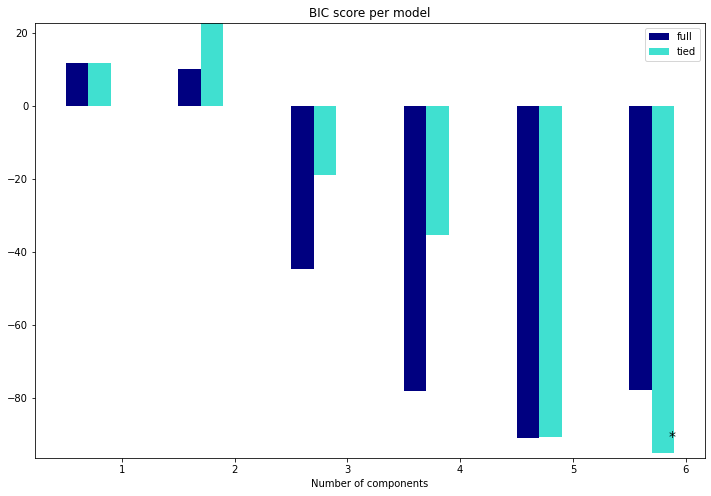

In [ ]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
# cv_types = ['spherical', 'tied', 'diag', 'full']
cv_types = ['full', 'tied']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit Gaussian mixture theo phương pháp huấn luyện EM
        gmm = GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X_std)
        bic.append(gmm.bic(X_std))
        # Gán model có BIC scores thấp nhất là model tốt nhất
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise'])
clf = best_gmm
bars = []

# Vẽ biểu đồ BIC scores
plt.figure(figsize=(12, 8))
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
plt.xlabel('Number of components')
plt.legend([b[0] for b in bars], cv_types)

Như vậy ta có thể nhận thấy mô hình phù hợp nhất là mô hình có `n_components = 6` và dạng `covariance_type` được sử dụng là `tied`.

In [ ]:
best_gmm

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

Tiếp theo chúng ta sẽ dự báo cụm và vẽ biểu đồ các điểm trên không gian 2 chiều.

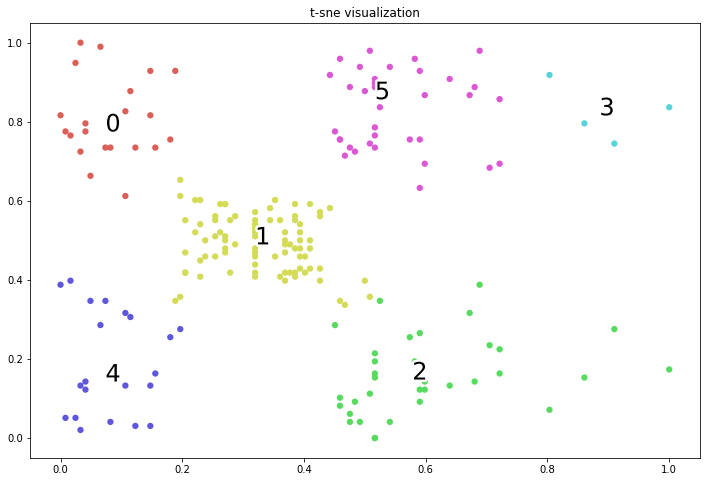

In [ ]:
def _plot_kmean_scatter(X, labels):
    '''
    X: dữ liệu đầu vào
    labels: nhãn dự báo
    '''
    # lựa chọn màu sắc
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))

    # vẽ biểu đồ scatter
    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=palette[labels.astype(np.int)])

    # thêm nhãn cho mỗi cluster
    txts = []

    for i in range(num_classes):
        # Vẽ text tên cụm tại trung vị của mỗi cụm
        xtext, ytext = np.median(X[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.title('t-sne visualization')

labels = best_gmm.predict(X_std)
_plot_kmean_scatter(X_std, labels)

Chúng ta nhận thấy rằng thuật toán _GMM_ đưa ra kết quả rất chuẩn xác. Nếu so sánh với các thuật toán khác như _k-Means, Hierarchical Clustering, DBSCAN_ thì kết quả của _GMM_ là chuẩn xác nhất trên bộ dữ liệu shopping-data. Tuy nhiên nhận định này không đúng trong mọi trường hợp đối với mọi bộ dữ liệu nên chúng ta cần phải thử nghiệm nhiều mô hình khác nhau để so sánh.

# Tổng kết

_GMM_ là một mô hình xác suất. Mô hình này thể hiện sự cải tiến so với _k-Means_ đó là các điểm dữ liệu được sinh ra từ một phân phối hỗn hợp của một số hữu hạn các _phân phối Gaussian đa chiều_. Tham số của những phân phối này được giả định là chưa biết. Để tìm ra tham số huấn luyện cho các mô hình thì chúng ta sẽ tìm cách tối đa hoá hàm _auxiliary_ thông qua thuật toán _EM_, thuật toán này sẽ cập nhật nghiệm sau mỗi vòng lặp để đi đến điểm cực trị. Chúng ta có thể coi rằng các mô hình hỗn hợp như là một dạng khái quát của thuật toán _k-Means clustering_ nhằm kết hợp với thông tin về hiệp phương sai của dữ liệu cũng như là tâm của các phân phối _Gaussian_ tiềm ẩn. Cùng tổng kết một số kiến thức mà chương này mang lại:

* _Phân phối Guassian đa biến_ là gì ? Chúng được đặc trưng bởi những tham số nào?
* Phương pháp _EM_ trong huấn luyện _hàm hợp lý_.
* Xây dựng mô hình _GMM_ trên sklearn.
* Cách thức lựa chọn tham số cho mô hình _GMM_ thông qua chỉ số _BIC_.

# Bài tập

1. Giả sử một biến $\mathbf{x} \in \mathbb{R}^{2}$ có _phân phối Gaussian đa chiều_ với trung bình là $\mu = [1, 1]$ và ma trận hiệp phương sai là ma trận đơn vị $\mathbf{\Sigma} = \mathbf{I}_2$. Hãy tính xác suất:

$$N(\mu, \mathbf{\Sigma}| \mathbf{x}_i = [0, 0]))$$

2. Ước lượng MLE của _phân phối Gaussian đa chiều_ có kết quả như thế nào?

3. Trong mô hình _GMM_ thì mỗi một điểm dữ liệu là kết hợp của một hay nhiều phân phối xác suất thành phần?

4. Thuật toán _EM_ giúp huấn luyện mô hình _GMM_ bao gồm những bước nào? Mỗi bước thực hiện mục tiêu gì?

5. Có những siêu tham số chính nào được sử dụng để tuning mô hình _GMM_?

6. Để tìm ra những siêu tham số cho mô hình _GMM_ chúng ta dựa trên chỉ số nào? Chỉ số đó có ý nghĩa gì?

7. Có những dạng covariance nào trong thuật toán _GMM_ những dạng này có ý nghĩa gì?

8. Sử dụng bộ dữ liệu [Weekly Sale Transaction](https://archive.ics.uci.edu/ml/datasets/Sales_Transactions_Dataset_Weekly) hãy phân chia tập train/test theo tỷ lệ 80:20.

9. Tìm kiếm tham số phù hợp cho mô hình _GMM_.

10. Biểu đồ hoá kết quả dự báo trên tập train và tập test.

# Tài liệu tham khảo

https://towardsdatascience.com/gaussian-mixture-models-explained-6986aaf5a95

[1] Bishop, Christopher M. Pattern Recognition and Machine Learning (2006) Springer-Verlag Berlin, Heidelberg.

[2] Murphy, Kevin P. Machine Learning: A Probabilistic Perspective (2012) MIT Press, Cambridge, Mass,


https://people.eecs.berkeley.edu/~jordan/courses/260-spring10/other-readings/chapter13.pdf

http://ttic.uchicago.edu/~shubhendu/Slides/Estimation.pdf

https://web.iitd.ac.in/~sumeet/GMM_said_crv10_tutorial.pdf